In [39]:
#dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy import stats
import os

In [2]:
# Store filepath in a variable
csv_path = "Resources/Life_Expectancy.csv"

In [50]:
#READ IN CSV
life_exp = pd.read_csv(csv_path, encoding="utf-8")
life_exp = life_exp.rename(columns={"Life expectancy ":"Life Expectancy"})
life_exp

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [47]:
life_exp.groupby(["Year"]).mean()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399
2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,5.699000,82.236264,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919
2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,5.631056,84.318681,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,5.723056,84.857143,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301


In [23]:
#reduce GDP to 2000-2015

csv_file = os.path.join('Resources','GDP_1970_to_2018.csv')
gdp_data = pd.read_csv(csv_file)
gdp_data.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,...,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,...,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,...,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN


In [25]:
gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df.dropna()

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,128.0,2.192235,9.996986,0.001430,0.032350,0.155630,0.899435,107.330300
1,1971,129.0,2.404500,10.862506,0.001528,0.036280,0.168522,0.918177,116.485000
2,1972,129.0,2.774642,12.106388,0.001894,0.041067,0.196873,0.966416,127.911000
3,1973,129.0,3.384634,13.849898,0.002420,0.052355,0.246549,1.384189,142.537600
4,1974,130.0,3.872147,15.033413,0.003151,0.057039,0.294950,1.630835,154.524300
5,1975,132.0,4.258645,16.379220,0.003251,0.068881,0.304692,1.749478,168.490400
6,1976,133.0,4.595556,18.007177,0.003004,0.073229,0.328430,1.775483,187.341200
7,1977,137.0,5.042549,19.939779,0.003414,0.075005,0.324970,1.983813,208.182600
8,1978,136.0,5.991148,23.370057,0.004157,0.092306,0.371035,2.376566,235.159900
9,1979,137.0,6.906515,26.099529,0.004262,0.108060,0.442134,2.794041,262.733400


In [26]:
gdp_summary_df['Year']=gdp_summary_df['Year'].astype(int)


In [51]:
new_life = life_exp.groupby(["Year"]).mean()
new_life

,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399
2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,84.527473,5.699000,82.236264,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919
2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,84.802198,5.631056,84.318681,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,85.565934,5.723056,84.857143,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301


In [52]:
new_life.reset_index(level=0, inplace=True)
new_life.head()

,Year,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
1,2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2,2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
3,2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
4,2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399


In [54]:
#pd.concat([new_life, gdp_summary_df], ignore_index=True)

merge_table2 = pd.merge(new_life, gdp_summary_df, on='Year')

merge_table2


,Year,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Income composition of resources,Schooling,count,mean,std,min,25%,50%,75%,max
0,2000,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,...,0.512214,10.512717,198.0,16.762140,83.755230,0.001374,0.173945,0.819837,5.318316,1025.234546
1,2001,67.128962,175.169399,36.825137,4.555659,516.625910,73.957895,4640.262295,36.135912,52.038251,...,0.563012,10.950289,198.0,16.678424,84.315397,0.001320,0.168335,0.821834,5.396157,1058.182140
2,2002,67.351366,171.437158,35.584699,4.660934,476.794487,76.522124,3204.754098,37.110497,50.300546,...,0.568006,11.140462,203.0,16.897966,85.626187,0.001545,0.182472,0.777508,5.576783,1093.641905
3,2003,67.433333,169.131148,34.874317,4.690495,494.706547,74.099237,3708.792350,36.440331,48.584699,...,0.572399,11.308092,203.0,18.972229,91.202597,0.001823,0.232230,0.868323,6.401254,1145.824388
4,2004,67.646448,186.262295,33.644809,4.753681,772.336156,77.985507,2805.497268,36.572376,47.092896,...,0.584168,11.547399,204.0,21.287228,98.138471,0.002153,0.280929,1.023246,7.594080,1221.372915
5,2005,68.209290,167.633880,32.366120,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,...,0.596445,11.675723,205.0,22.945533,103.641548,0.002184,0.300673,1.196448,8.605792,1303.664023
6,2006,68.667760,170.404372,31.808743,4.917692,828.776319,81.894040,2063.224044,37.534254,44.273224,...,0.632312,11.917919,205.0,24.884417,109.310244,0.002290,0.345288,1.450255,10.748403,1381.461141
7,2007,69.036066,159.808743,30.612022,5.014066,954.458468,81.584906,1557.540984,36.977901,42.732240,...,0.639000,12.038150,206.0,27.915779,115.998342,0.002044,0.424909,1.718114,12.651914,1445.185865
8,2008,69.427869,174.519126,29.568306,5.007088,1095.802669,83.644172,1523.229508,38.225414,41.322404,...,0.645717,12.176301,205.0,30.777087,121.529524,0.003029,0.478493,1.974989,14.739509,1471.284408
9,2009,69.938251,163.393443,28.956284,4.889231,719.827424,84.277108,1522.606557,39.583425,39.770492,...,0.651434,12.310983,205.0,29.193127,119.508651,0.002710,0.458385,1.864837,12.082299,1444.893303


The r-squared is: 0.9862126146288583


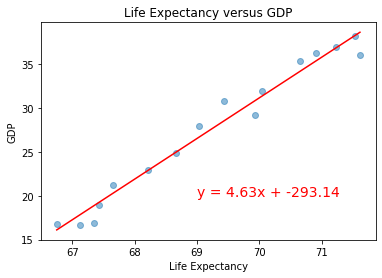

In [68]:
#life expectancy over time versus average gdp
x_values = merge_table2['Life Expectancy']
y_values = merge_table2['mean']
y_values = y_values.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(69,20),fontsize=14,color="red")
plt.title("Life Expectancy versus GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
print(f"The r-squared is: {rvalue}")

plt.savefig("LifeExp_vs_GDP.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

In [66]:
age = 90

print(f"For the life expectancy of {age} years, the GDP would have to be {round(slope * age + intercept,2)}.")

For the life expectancy of 90 years, the GDP would have to be 123.82.
